# Projet AirBnB - Prétraitement des Données (Side Quest)
### Ce notebook a pour objectif de préparer le dataset pour la prédiction du prix d'un logement sur Airbnb.
### Il est structuré en plusieurs sections : chargement et exploration des données, prétraitement, et séparation des données pour une future modélisation.
### Chaque membre pourra compléter sa partie en fonction de son rôle.

 ## Table des Matières
### 1. Introduction
### 2. Chargement et Exploration des Données
### 3. Prétraitement des Données
###    - 3.1 Sélection des Colonnes Pertinentes
###    - 3.2 Suppression des Doublons
###    - 3.3 Gestion des Valeurs Manquantes
###    - 3.4 Conversion des Types de Données
###    - 3.5 Gestion des Valeurs Aberrantes
### 4. Séparation des Données (Train/Test Split)
### 5. Bonus: Préparation pour la Régression Linéaire
### 6. Conclusion et Perspectives


## 1. Introduction
### Dans ce projet, nous préparons le dataset AirBnB afin de prédire le prix des logements.
### Ce notebook se concentre sur la partie prétraitement des données avant l'application des algorithmes de prédiction.
### Chaque membre de l'équipe pourra ajouter des analyses ou des ajustements au fur et à mesure.


In [201]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re

%matplotlib inline

In [202]:
import sys
print(sys.executable)

c:\Users\Kraich\anaconda3\python.exe


 ## 2. Chargement et Exploration des Données
### Charger le fichier CSV et effectuer une première exploration du dataset.

In [203]:
# TODO: Remplacer le chemin par le chemin de votre fichier CSV si nécessaire
file_path = 'listings.csv'
df = pd.read_csv(file_path)

# Affichage des premières lignes du dataset
#print(df.head())

# Informations générales sur le dataset
#print(df.info())

# Statistiques descriptives
df.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.103100e+04,9.103100e+04,9.103100e+04,91022.000000,91022.000000,0.0,91031.000000,91031.000000,91031.000000,60114.000000,...,67167.000000,67157.000000,67166.000000,67158.000000,67156.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000
mean,6.081553e+17,2.024121e+13,1.818846e+08,30.396596,38.665465,NaN,48.864181,2.343099,3.229274,1.199737,...,4.656672,4.805165,4.827823,4.818905,4.624605,23.583010,22.522558,0.981808,0.019235,1.065495
std,5.127971e+17,3.728536e+01,2.006094e+08,127.009105,159.747472,NaN,0.018198,0.034228,1.667150,0.541934,...,0.455675,0.372354,0.361166,0.311784,0.441887,94.650167,93.227797,10.927202,0.335941,1.353293
min,3.109000e+03,2.024121e+13,2.626000e+03,0.000000,0.000000,NaN,48.816090,2.227420,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.233102e+07,2.024121e+13,1.956359e+07,1.000000,1.000000,NaN,48.850740,2.321011,2.000000,1.000000,...,4.500000,4.770000,4.800000,4.760000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,8.113895e+17,2.024121e+13,7.262684e+07,1.000000,2.000000,NaN,48.865470,2.346829,3.000000,1.000000,...,4.790000,4.920000,4.950000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.590000
75%,1.092549e+18,2.024121e+13,3.394154e+08,3.000000,5.000000,NaN,48.879055,2.368320,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,2.000000,0.000000,0.000000,1.420000
max,1.305100e+18,2.024121e+13,6.654112e+08,7663.000000,8018.000000,NaN,48.901510,2.467120,16.000000,42.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,826.000000,826.000000,181.000000,11.000000,49.380000


 ## 3. Prétraitement des Données
### Dans cette section, nous allons préparer le dataset pour l'analyse.
### Cette partie est à compléter par les membres de l'équipe selon les besoins.

## 3.1 Sélection des Colonnes Pertinentes
### Sélectionner les colonnes jugées importantes pour la prédiction du prix.

In [204]:
colonnes_pertinentes = [
    'price', 'accommodates', 'bedrooms', 'bathrooms_text', 
    'room_type', 'neighbourhood_cleansed', 'latitude', 'longitude', 
    'minimum_nights', 'maximum_nights', 'number_of_reviews', 
    'review_scores_rating', 'host_is_superhost', 'instant_bookable'
]

df = df[colonnes_pertinentes]
df.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,neighbourhood_cleansed,latitude,longitude,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,instant_bookable
0,$100.00,2,1.0,1 bath,Entire home/apt,Observatoire,48.83191,2.31870,2,30,4,5.00,f,t
1,$88.00,2,0.0,1 bath,Entire home/apt,Hôtel-de-Ville,48.85247,2.35835,3,730,425,4.62,NaN,f
2,$136.00,4,2.0,1 bath,Entire home/apt,Hôtel-de-Ville,48.85909,2.35315,10,130,367,4.73,t,f
3,NaN,3,2.0,1 bath,Entire home/apt,Opéra,48.87417,2.34245,7,365,5,4.80,f,f
4,$75.00,1,1.0,1 bath,Entire home/apt,Louvre,48.85898,2.34701,180,360,0,NaN,f,f


## 3.2 Suppression des Doublons
### Identifier et supprimer les doublons dans le dataset.

In [205]:
colonnes_cles = ['price', 'room_type', 'neighbourhood_cleansed', 'minimum_nights', 'number_of_reviews']
df_cleaned = df.drop_duplicates(subset=colonnes_cles, keep='first')

print("Doublons avant suppression :", df.duplicated(subset=colonnes_cles).sum())
print("Doublons après suppression :", df_cleaned.duplicated(subset=colonnes_cles).sum())

Doublons avant suppression : 30010
Doublons après suppression : 0


## 3.3 Gestion des Valeurs Manquantes
### Identifier et traiter les valeurs manquantes.


In [206]:
df_cleaned = df_cleaned.copy()

# Nettoyage de la colonne 'price'
df_cleaned['price'] = df_cleaned['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Remplacement des NaN dans 'price' par la médiane
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].median())

# Remplacement des NaN dans 'neighbourhood_cleansed' par 'Inconnu'
df_cleaned['neighbourhood_cleansed'] = df_cleaned['neighbourhood_cleansed'].fillna('Inconnu')

# Remplissage des NaN dans 'bedrooms' (approximation : accommodates / 2)
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].fillna(df_cleaned['accommodates'] // 2).astype(float)

# Remplacement des NaN dans 'bathrooms_text' par 'Unknown'
df_cleaned['bathrooms_text'] = df_cleaned['bathrooms_text'].fillna('Unknown')

# Remplacement des NaN dans 'review_scores_rating' par la médiane
df_cleaned['review_scores_rating'] = df_cleaned['review_scores_rating'].fillna(df_cleaned['review_scores_rating'].median())

# Remplacement des NaN dans 'host_is_superhost' par 'f'
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].fillna('f')

# Vérification finale des valeurs manquantes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   61021 non-null  float64
 1   accommodates            61021 non-null  int64  
 2   bedrooms                61021 non-null  float64
 3   bathrooms_text          61021 non-null  object 
 4   room_type               61021 non-null  object 
 5   neighbourhood_cleansed  61021 non-null  object 
 6   latitude                61021 non-null  float64
 7   longitude               61021 non-null  float64
 8   minimum_nights          61021 non-null  int64  
 9   maximum_nights          61021 non-null  int64  
 10  number_of_reviews       61021 non-null  int64  
 11  review_scores_rating    61021 non-null  float64
 12  host_is_superhost       61021 non-null  object 
 13  instant_bookable        61021 non-null  object 
dtypes: float64(5), int64(4), object(5)
memory u

 # 3.4 Conversion des Types de Données
### Convertir les colonnes en types appropriés, par exemple convertir 'price' en numérique.

In [207]:
label_encoder = LabelEncoder()

df_cleaned['room_type_encoded'] = label_encoder.fit_transform(df_cleaned['room_type'])
df_cleaned['neighbourhood_encoded'] = label_encoder.fit_transform(df_cleaned['neighbourhood_cleansed'])

# Extraction du nombre de salles de bain à partir de la colonne 'bathrooms_text'
df_cleaned['bathrooms_count'] = df_cleaned['bathrooms_text'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)

# Conversion en booléen
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].map({'t': True, 'f': False})
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].map({'t': True, 'f': False})

# Vérification de l'encodage

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   61021 non-null  float64
 1   accommodates            61021 non-null  int64  
 2   bedrooms                61021 non-null  float64
 3   bathrooms_text          61021 non-null  object 
 4   room_type               61021 non-null  object 
 5   neighbourhood_cleansed  61021 non-null  object 
 6   latitude                61021 non-null  float64
 7   longitude               61021 non-null  float64
 8   minimum_nights          61021 non-null  int64  
 9   maximum_nights          61021 non-null  int64  
 10  number_of_reviews       61021 non-null  int64  
 11  review_scores_rating    61021 non-null  float64
 12  host_is_superhost       61021 non-null  bool   
 13  instant_bookable        61021 non-null  bool   
 14  room_type_encoded       61021 non-null  int

In [208]:
# SUPPRESSION DES COLONNES INUTILES
df_cleaned = df_cleaned.drop(columns=['bathrooms_text','room_type','neighbourhood_cleansed'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  61021 non-null  float64
 1   accommodates           61021 non-null  int64  
 2   bedrooms               61021 non-null  float64
 3   latitude               61021 non-null  float64
 4   longitude              61021 non-null  float64
 5   minimum_nights         61021 non-null  int64  
 6   maximum_nights         61021 non-null  int64  
 7   number_of_reviews      61021 non-null  int64  
 8   review_scores_rating   61021 non-null  float64
 9   host_is_superhost      61021 non-null  bool   
 10  instant_bookable       61021 non-null  bool   
 11  room_type_encoded      61021 non-null  int32  
 12  neighbourhood_encoded  61021 non-null  int32  
 13  bathrooms_count        61021 non-null  int64  
dtypes: bool(2), float64(5), int32(2), int64(5)
memory usage: 5.

# 3.5 Gestion des Valeurs Aberrantes
### Détecter et gérer les valeurs aberrantes à l'aide de visualisations. 

price: Q1=106.0, Q3=220.0, IQR=114.0, lower_bound=1, upper_bound=9000
accommodates: Q1=2.0, Q3=4.0, IQR=2.0, lower_bound=1, upper_bound=20
bedrooms: Q1=1.0, Q3=2.0, IQR=1.0, lower_bound=1, upper_bound=15
minimum_nights: Q1=2.0, Q3=5.0, IQR=3.0, lower_bound=1, upper_bound=14.0
maximum_nights: Q1=31.0, Q3=1120.0, IQR=1089.0, lower_bound=1, upper_bound=450

Nombre de lignes contenant des outliers: 24572
Taille avant : (61021, 14)
Taille après suppression des outliers : (36449, 14)

📊 Statistiques avant suppression :
              price      bedrooms  accommodates  minimum_nights  \
count  61021.000000  61021.000000  61021.000000    61021.000000   
mean     231.921027      1.299356      3.284476       15.660363   
std      502.714116      0.897269      1.739767       57.758025   
min        7.000000      0.000000      1.000000        1.000000   
25%      106.000000      1.000000      2.000000        2.000000   
50%      150.000000      1.000000      3.000000        3.000000   
75%      220

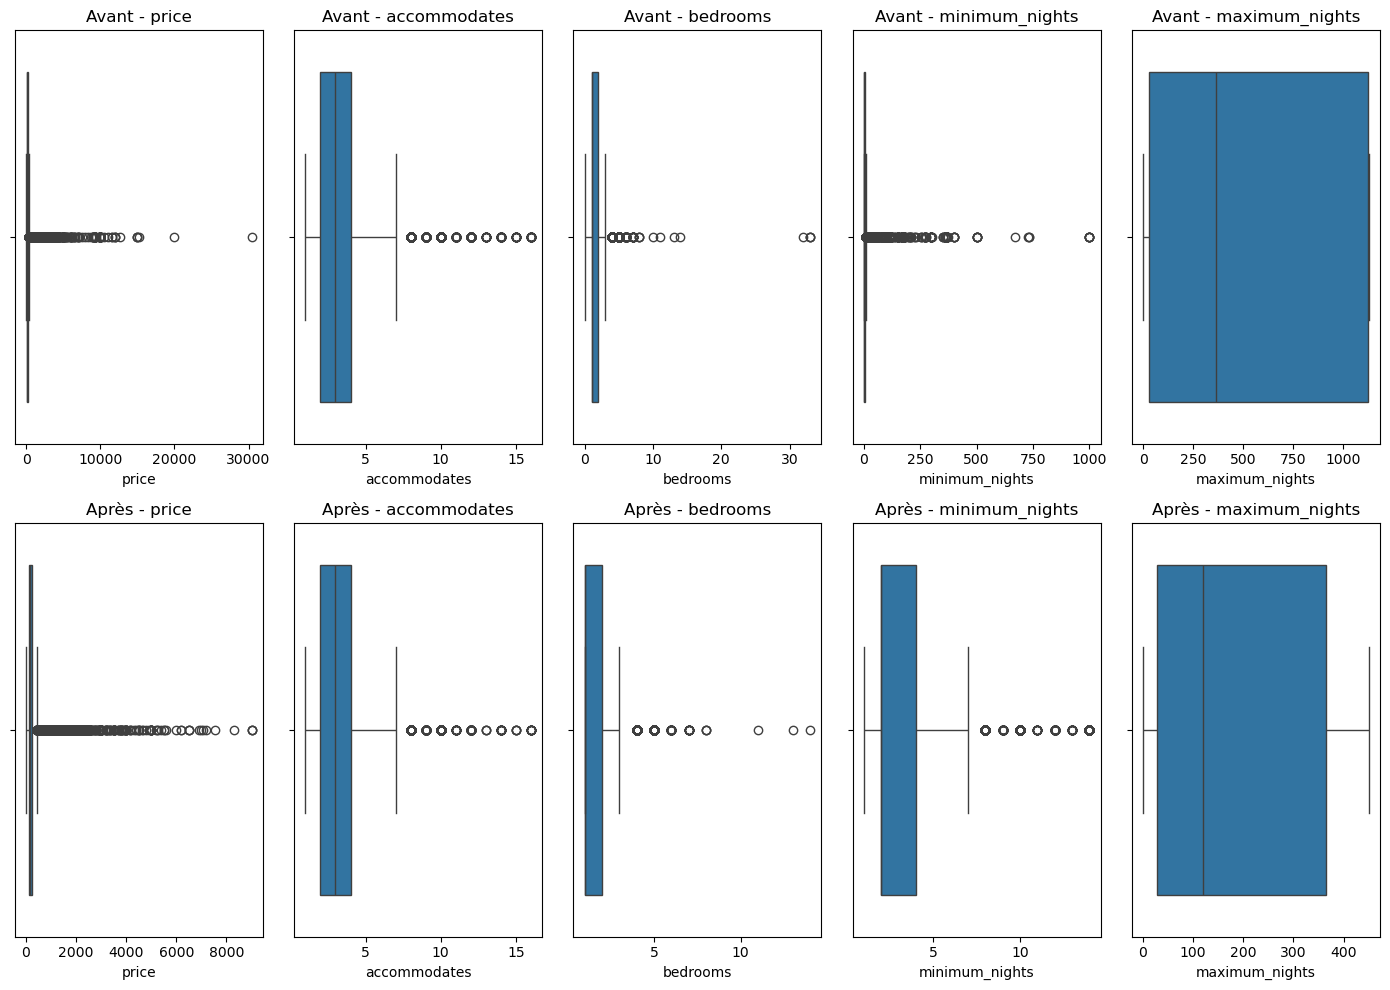

In [209]:
colonnes_pertinentes = ['price', 'accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights']

def remove_outliers_iqr(df, columns):
    outliers = pd.DataFrame() 
    outliers_rows = []  # Liste pour stocker les indices des lignes contenant des outliers

    for col in columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = max(Q1 - 1.5 * IQR, 1)  # Empêche les valeurs négatives
        upper_bound = Q3 + 3 * IQR

        if col == 'price':
            upper_bound = max(upper_bound, 9000)
        elif col == 'bedrooms':
            upper_bound = max(upper_bound, 15)
        elif col == 'accommodates':
            upper_bound = max(upper_bound, 20)
        elif col == 'minimum_nights':
            upper_bound = max(upper_bound, 14)
        elif col == 'maximum_nights':
            upper_bound = min(upper_bound, 450)

        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_rows.extend(df[outliers[col]].index)
        print(f"{col}: Q1={Q1}, Q3={Q3}, IQR={IQR}, lower_bound={lower_bound}, upper_bound={upper_bound}")

    outliers_combined = outliers.any(axis=1)
    df_cleaned_no_outliers = df[~outliers_combined]

    print(f"\nNombre de lignes contenant des outliers: {len(set(outliers_rows))}")
    
    return df_cleaned_no_outliers, outliers_rows

df_cleaned_no_outliers, outliers_rows = remove_outliers_iqr(df_cleaned, colonnes_pertinentes)

print(f"Taille avant : {df_cleaned.shape}")
print(f"Taille après suppression des outliers : {df_cleaned_no_outliers.shape}")

print("\n📊 Statistiques avant suppression :")
print(df_cleaned[["price", "bedrooms", 'accommodates', 'minimum_nights', "maximum_nights"]].describe())

print("\n📊 Statistiques après suppression :")
print(df_cleaned_no_outliers[["price", "bedrooms", 'accommodates', 'minimum_nights', "maximum_nights"]].describe())

plt.figure(figsize=(14, 10))

for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f"Avant - {col}")

for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(2, 5, i + 5)
    sns.boxplot(data=df_cleaned_no_outliers, x=col)
    plt.title(f"Après - {col}")

plt.tight_layout()
plt.show()


# Prix en relation avec la note du bien

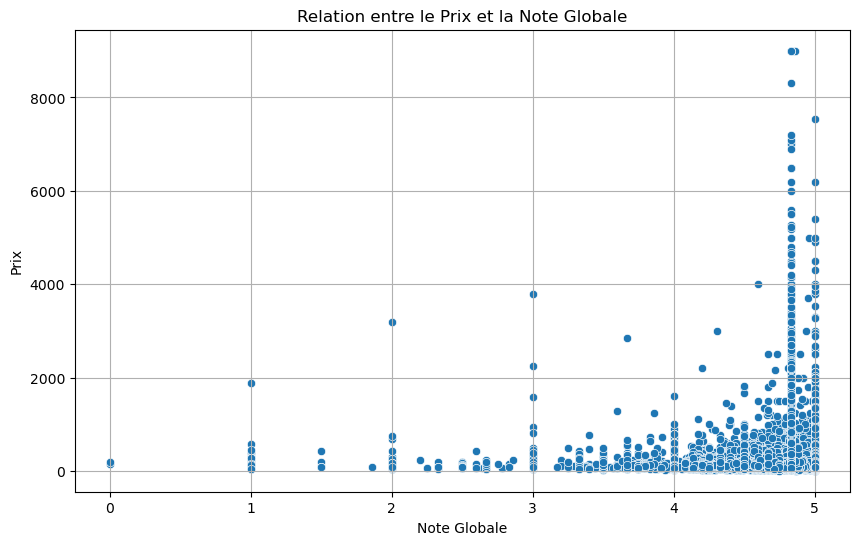

In [210]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned_no_outliers, x='review_scores_rating', y='price')

plt.title('Relation entre le Prix et la Note Globale')
plt.xlabel('Note Globale')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Prix moyen par type de propriétés

   room_type_label       price
0  Entire home/apt  251.920234
1       Hotel room  114.817204
2     Private room  205.960000
3      Shared room  154.661220


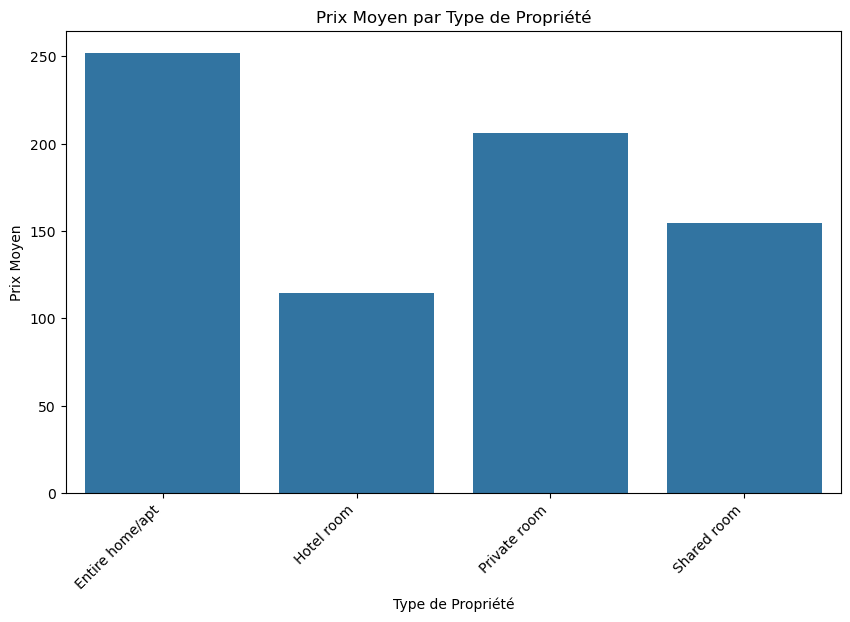

In [211]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()

room_type_map = {
    0: 'Entire home/apt',
    1: 'Private room',
    2: 'Shared room',
    3: 'Hotel room'
}

df_cleaned_no_outliers['room_type_label'] = df_cleaned_no_outliers['room_type_encoded'].map(room_type_map)

prix_moyen_par_type = df_cleaned_no_outliers.groupby('room_type_label')['price'].mean().reset_index()

print(prix_moyen_par_type)

plt.figure(figsize=(10, 6))
sns.barplot(data=prix_moyen_par_type, x='room_type_label', y='price')
plt.title('Prix Moyen par Type de Propriété')
plt.xlabel('Type de Propriété')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=45, ha='right')
plt.show()


# Répartition des Logements Disponibles et Non Disponibles

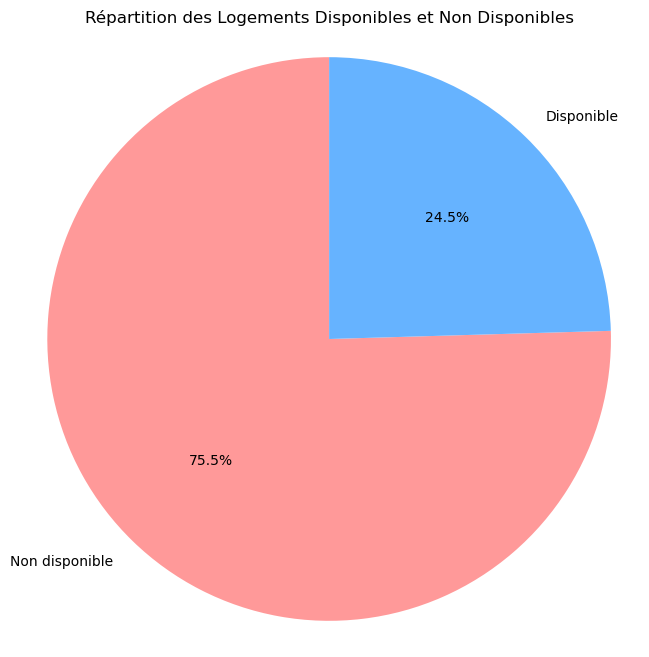

In [212]:

disponibilite = df_cleaned_no_outliers['instant_bookable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(disponibilite, labels=['Non disponible', 'Disponible'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Répartition des Logements Disponibles et Non Disponibles')
plt.axis('equal')
plt.show()


# 3.6 Normalisation des données
### Normalisation des données.  transformation des données pour qu'elles aient une moyenne de 0 et un écart-type de 1

In [213]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()
scaler = StandardScaler()

colonnes_numeriques = ['price', 'accommodates', 'bedrooms','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','bathrooms_count'] #latitude et longitude??

df_cleaned_no_outliers[colonnes_numeriques] = scaler.fit_transform(df_cleaned_no_outliers[colonnes_numeriques])

df_cleaned_no_outliers.head()

,price,accommodates,bedrooms,latitude,longitude,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,instant_bookable,room_type_encoded,neighbourhood_encoded,bathrooms_count,room_type_label
0,-0.415949,-0.824271,-0.571392,48.83191,2.31870,-0.452446,-0.950015,-0.405157,0.701578,False,True,0,10,-0.308094,Entire home/apt
2,-0.308632,0.326460,0.700233,48.85909,2.35315,3.779458,-0.336129,5.920163,-0.135693,True,False,0,6,-0.308094,Entire home/apt
3,-0.266898,-0.248906,0.700233,48.87417,2.34245,2.192494,1.106501,-0.387732,0.081377,False,False,0,11,-0.308094,Entire home/apt
5,-0.266898,-0.824271,-0.571392,48.86238,2.36957,0.605530,-0.943876,0.431249,0.453498,False,False,0,15,-0.308094,Entire home/apt
6,-0.266898,-0.824271,-0.571392,48.88494,2.33997,2.192494,-0.397518,0.117597,0.422488,False,False,0,3,-0.308094,Entire home/apt


 # 4. Séparation des Données (Train/Test Split)
### Préparer le dataset pour la modélisation en séparant les données en ensemble d'entraînement et de test.


# 5. Bonus: Préparation pour la Régression Linéaire
### Placeholder pour la future implémentation d'une régression linéaire.
### Cette section pourra être complétée ultérieurement avec la modélisation et l'évaluation.

# 6. Conclusion et Perspectives

### Ce notebook constitue la base du prétraitement des données pour le projet AirBnB.
### Chaque membre pourra ajuster ou compléter les sections selon l'évolution du projet.
### Pensez à ajouter des commentaires et des visualisations pertinentes pour documenter vos choix.